[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


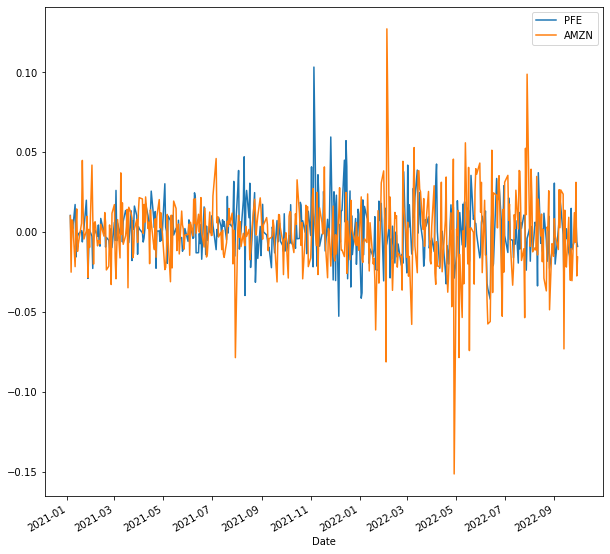

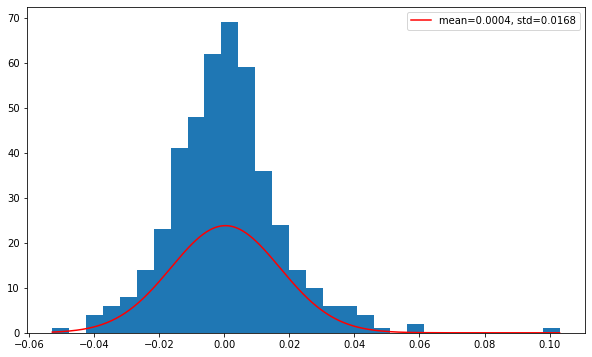

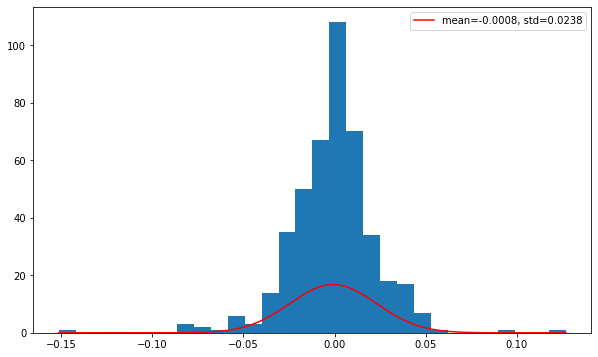

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

#get the historical prices for Bitcoin and Amazon
df1 = yf.download("AMZN", start="2021-01-01", end="2022-10-01",group_by="ticker") 
df1
df2= yf.download("PFE", start="2021-01-01", end="2022-10-01",group_by="ticker") 
df2
df = pd.DataFrame({'PFE': df2.Close,
                   'AMZN': df1.Close}
                   )
df

# shift moves dates back by 1
df_change = df.apply(lambda x: np.log(x) - np.log(x.shift(1)))
df_change.head()

# shift moves dates back by 1
df_change = df.apply(lambda x: np.log(x) - np.log(x.shift(1)))
# plot
df_change.plot(figsize=(10, 10))


#histogram
values = df_change['PFE'][1:]  # skip first NA value
x = np.linspace(values.min(), values.max(), len(values))
loc, scale = stats.norm.fit(values)
param_density = stats.norm.pdf(x, loc=loc, scale=scale)
label = 'mean=%.4f, std=%.4f' % (loc, scale)
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(values, bins=30)
ax.plot(x, param_density, 'r-', label=label)
ax.legend(loc='best')

#histogram2
values = df_change['AMZN'][1:]  # skip first NA value
x = np.linspace(values.min(), values.max(), len(values))
loc, scale = stats.norm.fit(values)
param_density = stats.norm.pdf(x, loc=loc, scale=scale)
label = 'mean=%.4f, std=%.4f' % (loc, scale)
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(values, bins=30)
ax.plot(x, param_density, 'r-', label=label)
ax.legend(loc='best')